# Personalización de rutas turíticas

In [1]:
#!pip install networkx

In [2]:
from networkx import *
import matplotlib.pyplot as plt

### Creación del grafo ponderado

In [3]:
G = Graph()

Para manejar con mayor comodidad los nombres de los nodos, se utilizarán las siguientes letras para representar los lugares respectivos en Florencia:
- A: Galleria dell'Accademia
- B: Catedral de Santa María del Fiore
- C: Biblioteca Laurentiana
- D: Piazza del Vino
- E: Palazzo Vecchio
- F: Galería Uffizi
- G: Mercado central de Florencia
- H: Palazzo Pitti
- I: Piazza del Duomo
- J: Ponte Vecchio
- K: Medici Villa at Castello
- L: Galería de la Academia
- M: Enoteca Pinchiorri 
- N: Via de'Tornabuoni
- O: Gelateria La Carraia
- P: Casa Buonarroti

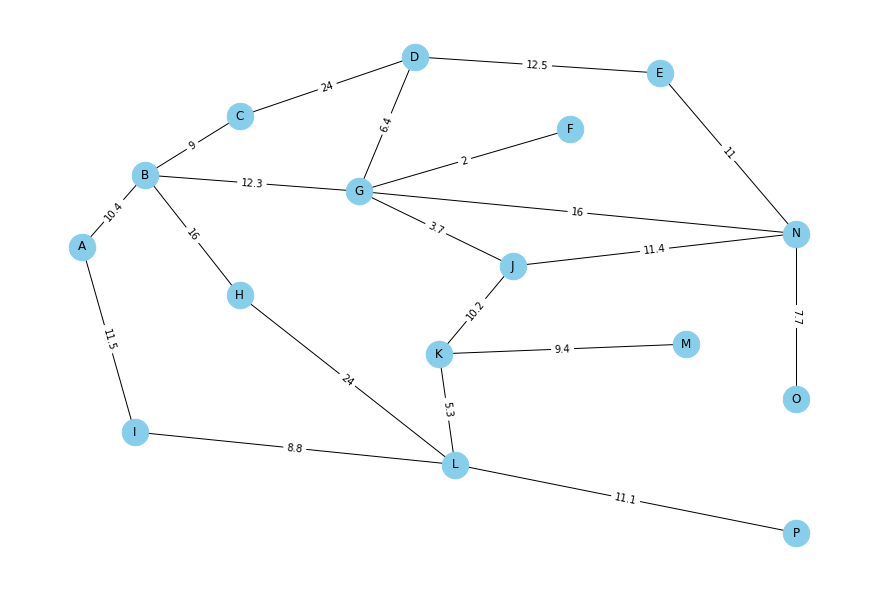

In [4]:
G = Graph()

# Agrega nodos y aristas con pesos
G.add_edge("A", "B", weight=10.4)
G.add_edge("A", "I", weight=11.5)
G.add_edge("B", "C", weight=9)
G.add_edge("C", "D", weight=24)
G.add_edge("D", "E", weight=12.5)
G.add_edge("E", "N", weight=11)
G.add_edge("N", "O", weight=7.7)
G.add_edge("B", "G", weight=12.3)
G.add_edge("B", "H", weight=16)
G.add_edge("H", "L", weight=24)
G.add_edge("I", "L", weight=8.8)
G.add_edge("K", "L", weight=5.3)
G.add_edge("J", "K", weight=10.2)
G.add_edge("G", "J", weight=3.7)
G.add_edge("D", "G", weight=6.4)
G.add_edge("G", "F", weight=2)
G.add_edge("G", "N", weight=16)
G.add_edge("J", "N", weight=11.4)
G.add_edge("K", "M", weight=9.4)
G.add_edge("L", "P", weight=11.1)

posiciones = {
    "A": (0, 0),
    "B": (7.2,13.2),
    "C": (18, 24),
    'D': (38, 35),
    'E': (66, 32),
    'F': (55.8, 21.6),
    'G': (31.6, 10.2),
    'H': (18, -9),
    'I': (6,-34.2),
    'J': (49.2, -3.6),
    'K': (40.8, -19.8),
    'L': (42.6, -40.2),
    'M': (69,-18),
    'N': (81.6, 2.4),
    'O': (81.6, -28.2),
    'P': (81.6, -52.8)
}

# Dibuja el grafo con etiquetas de peso
plt.figure(figsize=(12, 8))
labels = get_edge_attributes(G, "weight")
draw(G, pos=posiciones, with_labels=True, node_size=700, node_color="skyblue")
draw_networkx_edge_labels(G, pos=posiciones, edge_labels=labels)
plt.show()

In [5]:
betweenness_centrality = betweenness_centrality(G)

# Imprimir los valores de intermediación para cada nodo
for node, betweenness in betweenness_centrality.items():
    print(f"Nodo {node}: {betweenness}")

Nodo A: 0.0642857142857143
Nodo B: 0.29603174603174603
Nodo I: 0.0380952380952381
Nodo C: 0.0373015873015873
Nodo D: 0.07619047619047618
Nodo E: 0.015873015873015872
Nodo N: 0.20476190476190478
Nodo O: 0.0
Nodo G: 0.36190476190476195
Nodo H: 0.08571428571428572
Nodo L: 0.24206349206349206
Nodo K: 0.2611111111111111
Nodo J: 0.23095238095238096
Nodo F: 0.0
Nodo M: 0.0
Nodo P: 0.0


### Grafo personalizado por el usuario

Para crear un grafo ponderado que se adapte a las preferencias de cada turista, se utilizarán grafos inducidos, lo que implica incluir únicamente los nodos (lugares de Florencia) que sean de interés para el usuario en cuestión.

Se creará una función denominada ```Preferencias(a, b, c, d, e)``` que devolverá el grafo ponderado inducido, teniendo en cuenta las preferencias del usuario. Donde 'a' simboliza el deseo de visitar lugares de arte, 'b' denota interés en la historia, 'c' refleja el interés por la moda, 'd' representa el deseo de explorar lugares gastronómicos y 'e' se asocia a lugares reconocidos por su arquitectura."

Tenga en cuenta que se puede ampliar a muchos más ámbitos si hay más opciones en la ciudad o si el programador así lo desea.

Teniendo en cuenta los lugares anteriormente mencionados, estos se clasificas:
- Arte: A,F,H,P,L
- Historia: B,C,K,I
- Moda: N
- Comida: D,G,M,O
- Arquitectura: E,J

In [22]:
def Preferencias(lis,a=True,b=True,c=True,d=True,e=True):
    #crear una lista de tuplas(A,B,10), despues filtrarla para que crear aquellas 
    #qeu cumplan las preferencias(compararando con las listas de arte, historia,moda
    #comida,arquitectura)
    G = Graph()
    pref = []
    arte = ['A','F','H','P','L']
    hist = ['B','C','K','I']
    comida = ['D','G','M','O']
    arquit = ['E','J']
    if a: 
        pref += arte
    if b: 
        pref += hist
    if c: 
        pref.append('N')
    if d: 
        pref += comida
    if e: 
        pref += arquit
    print(pref)
    for i in pref:
        for j in [c for c in pref if c != i]:
            for a,b,c in lis:
                if (a==i and b==j) or (b==i and a==j):
                    G.add_edge(i, j, weight=c)
                else: 
                    G.add_node(i)
                    
    return G

In [23]:
florencia = [('A','B',10.4),('A','I',11.5),('B','C',9),('B','G',12.3),('B','H',16),
            ('C','D',24),('D','E',12.5),('E','N',11),('N','O',7.7),('D','G',6.4),
            ('G','F',2),('I','L',8.8),('L','P',11.1),('H','L',24),('G','N',16),
            ('G','J',3.7),('J','N',11.4),('J','K',10.2),('K','M',9.4),('K','L',5.3)]

In [24]:
G = Preferencias(florencia,True,True,True,False,False)

['A', 'F', 'H', 'P', 'L', 'B', 'C', 'K', 'I', 'N']


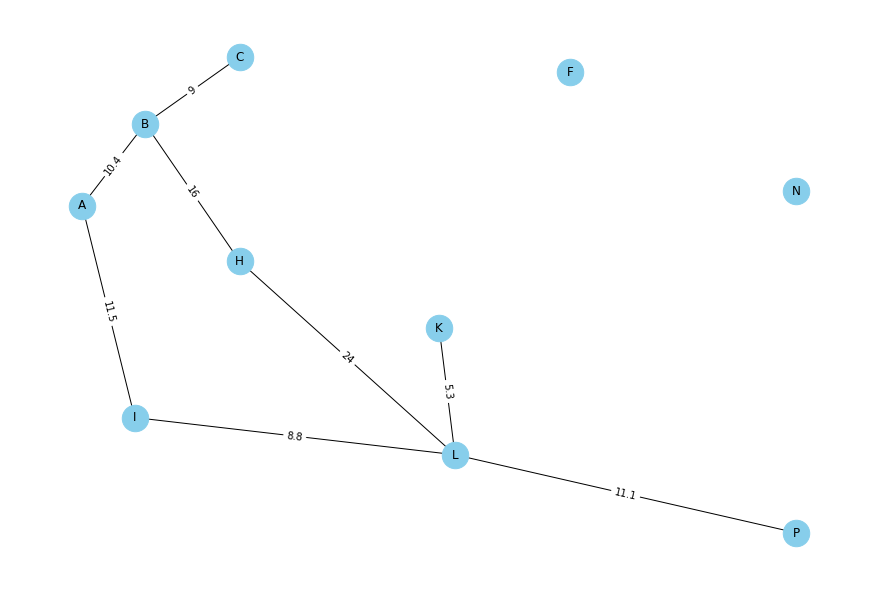

In [25]:
plt.figure(figsize=(12, 8))
labels = get_edge_attributes(G, "weight")
draw(G, pos=posiciones, with_labels=True, node_size=700, node_color="skyblue")
draw_networkx_edge_labels(G, pos=posiciones, edge_labels=labels)
plt.show()

Ahora bien, nótese que el grafo no es conexo, lo cual hará imposible para el turista desplazarse a los lugares deseados. 